# Homework 1 (HW1)

---
1. Load data from different formats using [pandas](https://pandas.pydata.org/);
2. Navigate the documentation of Python packages by yourself;
3. Filter and tidy up noisy data sets;
4. Aggregate your data in different (and hopefully helpful) ways; 
5. Create meaningful visualizations to analyze the data;
6. Critically think and write about data;
---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, 
you may do so, but must justify your choice.
2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you 
don’t change any of the files.)
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you 
implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation
 (**in markdown**).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a 
single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, 
we will **not grade** anything.
7. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results 
contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. 
Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended,
 you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. In continuation to the previous point, interactive plots, such as those generated using `plotly`, should be 
**strictly avoided**!
9. Make sure to print results or dataframes that confirm you have properly addressed the task.

---

## Context

In this project, we are going to analyze data from an experiment about *honesty*. 
Oftentimes, we are asked to confirm our honest intentions by signing **at the end** of a document. 
For example, in tax returns or insurance policy forms, we are often asked to sign our names under a text that reads 
something like "I hereby certify that the above statements are true and correct to the best of my knowledge."

However, when individuals sign **after** lying in the form, they may not feel the need to correct the falsehoods they 
have reported. In that context, it could be that signing at **the beginning** rather than at the end of the document 
would decrease dishonesty, as those who are filling the form would be aware of the ethical requirements *before* they 
provide the information in the form.

This intuition has led researchers to partner up with a motorcycle insurance company to run a randomized experiment. 
In this insurance company (as well as in many others), customers had to report the exact *odometer kilometrage*¹ in 
order for the company to adjust the insurance premiums. Note that motorcycles with lower kilometrage are less likely to 
have issues, and thus will result in a lower *insurance premium*². Therefore, customers have an incentive to lie, 
reporting a kilometrage lower than the real value, in order to save money.

In the experiment, two different forms were created: one where the signing was done at the end, and another where the 
signing was done at the beginning. The insurance company then randomized these forms (i.e., each customer received
 exactly one form, each with probability 50%) and sent back the data that customers had provided. Some noteworthy 
 details on the experiment are that:

- All customers involved in the experiment already had a contract with the company and were simply renewing it. 
In the data that the company provided, they also report the odometer kilometrage for their previous contract.
Each policy, therefore, contains two contracts: the "updated" contract —where the experiment was conducted— and 
the "baseline" contract, which was the previous contract customers had with the company.
- A single insurance policy can insure up to 4 distinct motorcycles.

In this assignment, you will take the role of the researcher and work analyzing this data!

*Glossary:*
1. **odometer kilometrage:** the total distance the motorcycle has traveled.
2. **insurance premiums:** the amount of money one pays for an insurance policy.

---

## The data

The company provided you with a compressed `.tsv` file containing one row per policy. 
The `.tsv` has the following fields:

- `condition`: either `Sign Top` or `Sign Bottom`, depending on which form was sent.
- `id`: unique identifier for each insurance policy.
- `motorcycle_count`: number of motorcycles covered by the insurance policy.
- `baseline_motorcycle[1-4]`: odometer kilometrage *reported by the customer* in the *previous (baseline)* contract. 
- `update_motorcycle[1-4]`: odometer kilometrage *reported by the customer* in the *current (updated)* contract.

Some comments:

- Recall that a single policy can ensure up to 4 motorcycles, and thus, the suffixes [1-4] indicate that there are 4 
versions of these columns in the data (e.g., `baseline_motorcycle1`, `baseline_motorcycle2`, `baseline_motorcycle3`, 
`baseline_motorcycle4`). 
- When a policy has fewer than 4 motorcycles, only the columns with the smaller numerals are filled (e.g., if a policy 
insures one motorcycle,  only `baseline_motorcycle1` and `update_motorcycle1` will be filled).
- Note that we only have access to the odometer kilometrage reported by the customers, 
which may be different from the real kilometrage of the motorcycles.

In [86]:
# Imports you may need
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np

### **Task 1** — 4pts

Your first task is to load the dataset into memory using pandas. 
**You should load the data directly from the compressed files.**

Here, the files at hand are rather small, and you could easily uncompress the files to disk and work with them as plain 
text. Why, then, are we asking you to load the files compressed? The reason is that, in your life as a data scientist, 
this will often not be the case. Then, working with compressed files is key so that you don't receive email from your 
(often more responsible) colleagues demanding to know how you have managed to fill the entire cluster with your 
datasets. Another big advantage of compressing files is to simply read files faster. You will often find that reading
compressed data on the fly (uncompressing it as you go), is much faster than reading uncompressed data, since reading
and writing to disk may be your [bottleneck](https://skipperkongen.dk/2012/02/28/uncompressed-versus-compressed-read/). 

---

**Hint:** `pandas` can open compressed files.

**Hint:** In the real world (and in ADA-homework), your file often comes with some weird lines! 
This time you can safely ignore them (but in the real world you must try to understand why they are there!). 
Check the `error_bad_lines` or the `on_bad_lines` (depending on your pandas version) parameter on `read_csv`.

In [87]:
filename = './data/data.tsv.gz'
df = pd.read_csv(filename, compression='gzip', sep='\t', error_bad_lines=False)

b'Skipping line 2142: expected 11 fields, saw 27\n'


In [88]:
df.head()

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1


### Task 2 — 12pts

As a good data scientist, the first thing you do is to clean up the data and perform some small sanity checks.

1. The motorcycle insurance company mentioned that each policy has a unique identifier, but that there may be duplicate 
rows (i.e., multiple rows with the same policy identifier). Check if there are duplicate policies and, if so, filter 
these rows from the data (always keeping the first).

2. According to the company, all policies should have kept the number of motorcycles from the previous contract (i.e., 
the number of motorcycles recorded in baseline contracts should equal the number of motorcycles in updated contracts). 
Also, the number of odometer readings for each contract should be the same as the number stated in the 
`motorcycle_count` variable. Check the data to see if these two things hold. If not, filter the anomalous rows.

3. Calculate the mean and the median value of each column related to kilometrages. Are the values obtained plausible? 
Visualize the distribution of the data and remove any extreme outliers.

4. **Discuss:** In cases where you cannot think of appropriate ways to remove outliers, would you prefer summarizing 
numerical data with outliers with the mean or the median? Why?

---

**Hint:** Here we are considering as outliers numbers that are not plausible in the context of motorcycle kilometrages.

#### 2.1 Filter duplicates

In [89]:
df.id.is_unique

False

In [90]:
df.drop_duplicates(['id'], inplace = True)
df.id.is_unique

True

#### 2.2 Filter anomalous rows

- All policies should have kept the number of motorcycles from the previous contract

In [91]:
print('Number of data samples before condition is: ',len(df))
df2 = df.copy()
df2.columns = [''] * len(df2.columns)
baseline_motorcycles = df2.iloc[:,2:10:2]
update_motorcycles = df2.iloc[:,3:11:2]
df = df[(baseline_motorcycles.notnull() & update_motorcycles.isnull()).sum(axis=1) == 0]
print('Number of data samples after condition is: ',len(df))

Number of data samples before condition is:  13488
Number of data samples after condition is:  13488


Thus the first condition (the number of motorcycles recorded in baseline contracts should equal the number of motorcycles in updated contracts) is already satisified. <br>
Let's check the number of odometer readings.

- The number of odometer readings for each contract should be the same as the number stated in the  motorcycle_count variable

In [92]:
print('Number of data samples before filtering is: ',len(df))
motorcycles_not_nan = df.iloc[:, 2:10:2].notnull()
df = df[motorcycles_not_nan.sum(axis=1) == df['motorcycle_count']]
print('Number of data samples after filtering is: ',len(df))

Number of data samples before filtering is:  13488
Number of data samples after filtering is:  13488


The number of odometer readings for each contract are the same as the number stated in the motorcycle_count variable.<br>
Let's check the last condition and filter if necessary.



- When a policy has fewer than 4 motorcycles, only the columns with the smaller numerals are filled

In [93]:
print('Number of data samples before filtering is: ',len(df))
df2 = df.copy()
df2.columns = [''] * len(df2.columns)
df = df[(df2.iloc[:,2:8:2].isnull() & df2.iloc[:,4:10:2].notnull()).sum(axis=1) == 0]
print('Number of data samples after filtering is: ',len(df))

Number of data samples before filtering is:  13488
Number of data samples after filtering is:  12598


The last line works this way: if baseline_motorcycle1 is null and baseline_motorcycle2 is not, then the sum gives at least 1. Then we move to the next comparison: if baseline_motorcycle2 is null and baseline_motorcycle3 is not, then the sum is at least 1, etc ... 
Thus at the end we can filter all the rows which don't align with the condition of smaller numerals.

#### 2.3 Mean and the median value of each column related to kilometrages and data distribution

In [94]:
df.iloc[:, 2:10].mean()

baseline_motorcycle1    7.937768e+14
update_motorcycle1      7.937768e+14
baseline_motorcycle2    6.753130e+04
update_motorcycle2      9.248932e+04
baseline_motorcycle3    7.120608e+04
update_motorcycle3      9.579786e+04
baseline_motorcycle4    1.054344e+05
update_motorcycle4      1.320597e+05
dtype: float64

In [95]:
df.iloc[:, 2:10].median()

baseline_motorcycle1     56000.0
update_motorcycle1       82188.5
baseline_motorcycle2     56141.0
update_motorcycle2       82119.0
baseline_motorcycle3     62932.0
update_motorcycle3       90602.0
baseline_motorcycle4    105271.0
update_motorcycle4      136092.0
dtype: float64

- Plausibility of the values 

The values of the mean are quite plausible except for motorcycle 1 which has nearly the same mean in baseline and updated kilometrage, and these values are very big compared to others. Also when we see that the difference between baseline and updated in the median is more than 26000, we understand there may be some outliers in motorcycle 1 that cause a skewness in the distribution. <br>
For the median the results seem plausible.

- Visualization

Text(0.5, 1.0, 'Distribution of motorcycle1 kilometrage')

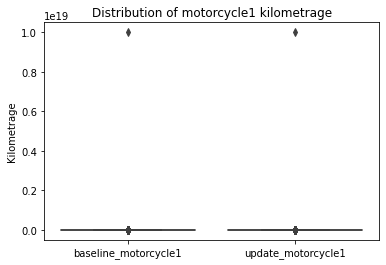

In [96]:
ax = sns.boxplot(data=df[['baseline_motorcycle1','update_motorcycle1']])
plt.ylabel('Kilometrage')
plt.title('Distribution of motorcycle1 kilometrage')

As expected, motorcycle 1 contains extreme outlier that makes the boxplot not any larger than a line, let's remove it.

In [97]:
# Drop outlier (we choose 2e18 from the figure above)
print('Number of data samples before filtering is: ',len(df))
df = df[~(df['update_motorcycle1']> 2e18)]
df = df[~(df['baseline_motorcycle1']> 2e18)]
print('Number of data samples after filtering is: ',len(df))

Number of data samples before filtering is:  12598
Number of data samples after filtering is:  12596


Text(0.5, 1.0, 'Distribution of motorcycle1 kilometrage (outliers removed)')

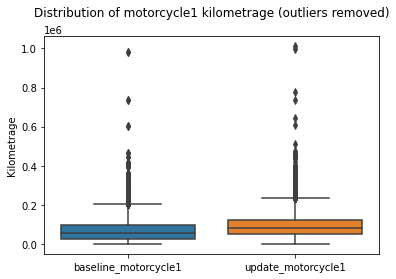

In [98]:
ax = sns.boxplot(data=df[['baseline_motorcycle1','update_motorcycle1']])
plt.ylabel('Kilometrage')
plt.title('Distribution of motorcycle1 kilometrage (outliers removed)', pad=20)

As shown above, there are other ouliers that could have been removed, but we assume that we're only told to remove extreme ones, as it's an acceptable long-tailed distribution.

#### 2.4 Discuss: In cases where you cannot think of appropriate ways to remove outliers, would you prefer summarizing numerical data with outliers with the mean or the median? Why?

In cases we couldn't think of appropriate ways to remove outliers, we would be summarizing numerical data with the median because it's more robust to outliers. For instance, a single outlier with a very high value would significantly increase the mean but may only increase the median by 1.

### Task 3 — 12pts

One of the challenges with the current data is that it is not clear how to handle policies with multiple motorcycles.

1. Create three additional columns in the dataframe, `baseline_average`, `update_average`, and `diff_average`. These 
should contain, respectively, the average value for `baseline_motorcycle[1-4]` for all motorcycles insured; the average
 value for `update_motorcycle[1-4]`; and the difference between the average updated value and the average baseline 
 value.
2. **Discuss:** Propose another way of aggregating distinct motorcycles from a single policy. Point out a way in which 
this aggregation may be either better or worse than taking the average for the purpose of comparing the two scenarios in
 the study (sign at the top vs. sign at the bottom).
3. To get a sense of the impact that policies with multiple motorcycles may have in the study, let's perform some 
additional analyses. Plot the distribution of motorcycles per policy in the data. Your plot should allow for the 
meaningful comparison of the values shown.
4. In 3.1, you calculated the average kilometrage for each policy for the updated contract. Calculate the mean and the 
standard deviation of these values (which should be in the column `update_average`).
5. Another meaningful metric is the average kilometrage **per motorcycle**, not distinguishing motorcycles in different 
policies (i.e., pooled across policies). **Considering only policies with 4 motorcycles insured,** calculate the mean 
and the standard deviation of the kilometrage per motorcycle in the updated contract.
6. **Discuss:** To analyze whether signing at the top decreases dishonesty, we could consider the data in different 
ways. We could first calculate the average value per motorcycle within each policy and have one data point per policy 
**or** we could analyze the data at the motorcycle level and have one data point per motorcycle in the dataset. 
According to questions 3.4 and 3.5, how may this decision influence the results of the study?
---

#### 3.1 Creation of baseline_average, update_average, and diff_average

In [99]:
df['baseline_average'] = df[["baseline_motorcycle1", "baseline_motorcycle2","baseline_motorcycle3","baseline_motorcycle4"]].mean(axis=1)
df['update_average'] = df[["update_motorcycle1", "update_motorcycle2","update_motorcycle3","update_motorcycle4"]].mean(axis=1)
df['diff_average'] = df['update_average']-df['baseline_average']

#### 3.2  Discussion:  Aggregation method 

Another way of aggregating the data, at the policy level, would be to compute statistics for baseline and updates motorcycle wise. However, this might be a bad idea as we may not have enough data samples in some of the motorcycles (e.g. motorcycle 4) which may not be enough to have significant results.

#### 3.3 Plotting stats per policy

Text(0.5, 1.0, 'Number of policies per number of motocycles')

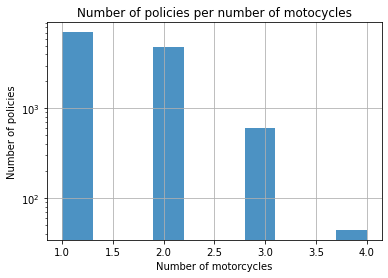

In [100]:
df['motorcycle_count'].hist(alpha = 0.8)
plt.xlabel('Number of motorcycles')
plt.ylabel('Number of policies')
plt.yscale('log') # To show also the number of poilicies that have of motorcycles
plt.title('Number of policies per number of motocycles')

#### 3.4. Mean and std of update_average

In [101]:
print(('The mean of the average kilometrage in updated motorcycles is: {mean:.2f}').format(mean=df['update_average'].mean()))
print(('The standard deviation of the average kilometrage in updated motorcycles is: {std:.2f}').format(std=df['update_average'].std()))

The mean of the average kilometrage in updated motorcycles is: 92204.34
The standard deviation of the average kilometrage in updated motorcycles is: 53013.21


#### 3.5. Mean and std per motorcycle

In [102]:
policies_4_motorcycles = df[df['motorcycle_count']==4].iloc[:,2:10]

In [103]:
# Baseline
stats_baseline = pd.DataFrame({'Mean':policies_4_motorcycles.iloc[:,0:8:2].mean(), 'Std' :policies_4_motorcycles.iloc[:,0:8:2].std()})
stats_baseline.columns = pd.MultiIndex.from_tuples((("Baseline", "Mean"), ("Baseline", "Std")))
stats_baseline.reset_index(drop=True, inplace=True)
# Update
stats_update = pd.DataFrame({'Mean Update':policies_4_motorcycles.iloc[:,1:9:2].mean(), 'Std Update':policies_4_motorcycles.iloc[:,1:9:2].std()})
stats_update.columns = pd.MultiIndex.from_tuples((("Update", "Mean"), ("Update", "Std")))
stats_update.reset_index(drop=True, inplace=True)
stats_all = pd.concat([stats_baseline, stats_update], axis=1)
stats_all.index =['Motorcycle1', 'Motorcycle2', 'Motorcycle3', 'Motorcycle4']
stats_all

Baseline                        Update               
                      Mean            Std           Mean            Std
Motorcycle1   69389.295455  123619.320059   93070.863636  125079.542134
Motorcycle2   98630.659091   69060.424448  123098.886364   72894.604040
Motorcycle3   81220.363636   58626.832583  105545.977273   63687.688176
Motorcycle4  105434.386364   47830.315850  132059.727273   46731.602932

#### 3.6 Discussion: Influence of previous stats on the study

Taking one data point per policy depicts the behaviour of each policy holder in terms of each motorcycle's usage while it's more interesting to have global kilometrage tendency over different policy holders.<br>
Based on questions 3.4 et 3.5, it is more useful to analyze the data at the motorcycle level and have one data point per motorcycle. In fact, when averaging column wise (one data point per motorcycle), data points are more likely to come from the same distribution. Indeed, it is particularly important to average over different types of people (liers and honnest) within the same motorcycle so that the mean and the standard variation become more meaningful because they are more representative of the kilometrage tendency.


### Task 4 — 18pts

Now that we have compressed the kilometrage reported in each contract into a single number, it is time to analyze the 
million-dollar question: *does signing at the top decrease dishonesty?*

1. Considering the updated contracts, calculate the mean and the standard deviation of the average kilometrage in a) 
policies where the signing was done at the bottom; and b) policies where the signing was done at the top. Additionally,
plot the two kilometrage distributions.
2. Determine whether the difference between the two scenarios mentioned in 1. is statistically significant.
3. **Discuss:** Recall that the assignment of the different contracts (*sign at the top* vs. *sign at the bottom*) was 
done at random. According to the results in 1. and 2., does signing at the top decrease dishonesty? 
4.  **Discuss:** Given that no intervention was performed in the baseline contract (i.e., everyone signed at the 
bottom). Would you expect any differences between the average values between *sign at the top* vs. *sign at the bottom*
 conditions for the baseline contract? Note that this is related to columns `baseline_motorcycle[1-4]`.
5. Calculate the mean and the standard deviation for the baseline contracts of the two groups (sign at the top vs. sign 
at the bottom). Additionally, plot the two kilometrage distributions.
6. Determine whether the difference between the two scenarios mentioned in 5. is statistically significant.

---

**Hint:** Recall that the column `condition` encodes the experimental condition in which the customer fell when 
reporting the values shown in columns `update_motorcycle[1-4]`!

**Hint:** To determine if the means of two sets of data are significantly different from each other, you may want to use
 the `ttest_ind` function implemented in the 
 [scipy library](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html). To learn more about 
 Student's t-test, check out this [Wikipedia page](https://en.wikipedia.org/wiki/Student%27s_t-test).

#### 4.1 Mean and std of the average kilometrage

In [104]:
updated_contracts_bottom = df['update_average'][df['condition']=='Sign Bottom']
updated_contracts_top = df['update_average'][df['condition']=='Sign Top']

##### a) For those who signed at the bottom

In [105]:
print(('Mean of the average kilometrage in updated motorcycles where the signing was done at the bottom: {mean:.2f}').format(mean=updated_contracts_bottom.mean()))
print(('Std of the average kilometrage in updated motorcycles where the signing was done at the bottom: {std:.2f}').format(std=updated_contracts_bottom.std()))

Mean of the average kilometrage in updated motorcycles where the signing was done at the bottom: 98755.66
Std of the average kilometrage in updated motorcycles where the signing was done at the bottom: 52780.44


##### b) For those who signed at the top

In [106]:
print(('Mean of the average kilometrage in updated motorcycles where the signing was done at the bottom: {mean:.2f}').format(mean=updated_contracts_top.mean()))
print(('Std of the average kilometrage in updated motorcycles where the signing was done at the bottom: {std:.2f}').format(std=updated_contracts_top.std()))

Mean of the average kilometrage in updated motorcycles where the signing was done at the bottom: 85831.56
Std of the average kilometrage in updated motorcycles where the signing was done at the bottom: 52463.50


##### Kilometrage distribution for the update contracts (without outliers)

Text(0.5, 1.0, 'Kilometrage distribution of update average')

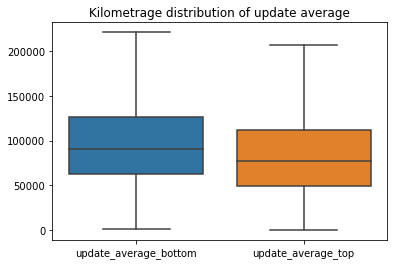

In [107]:
updated_contracts_bottom = pd.DataFrame(updated_contracts_bottom).add_suffix('_bottom')
updated_contracts_top = pd.DataFrame(updated_contracts_top).add_suffix('_top')
sns.boxplot(data=pd.concat([updated_contracts_bottom['update_average_bottom'], updated_contracts_top['update_average_top']], axis=1), showfliers=False)
plt.title('Kilometrage distribution of update average')

#### 4.2 Statistical significance

In [108]:
Test_mean = stats.ttest_ind(updated_contracts_bottom,updated_contracts_top)
Test_mean

Ttest_indResult(statistic=array([13.78141984]), pvalue=array([6.74966694e-43]))

We notice that p value is infinitely small (<< 0.05) and statistic is very large, given the degrees of freedom of our data, we can confidently reject the null hypothesis H0 (means are equal). Consequently, the difference between the two scenarios is statistically significant.

#### 4.3 Discussion: does signing at the top decrease dishonesty?

Since p value is infinitely small and statistic is very large, given the degrees of freedom of our data, we can confidently reject the null hypothesis H0 (means are equal). Then, it is not just by chance that they are intrinsically different. 
(Link to T-table used https://www.ruf.rice.edu/~bioslabs/tools/stats/ttable.html)
From questions 4.1 and 4.2, we know that the mean of the average kilometrage in contracts signed at the top is higher than the mean of the average kilometrage in contracts signed at the bottom. Consequently, signing at the top very likely  decreases dishonesty. 

#### 4.4 Discussion: Would you expect any differences between the average values between sign at the top vs. sign at the bottom conditions for the baseline contract?

Since participants already had contracts before this experiment, we should not expect any difference between the average value between signing at the top and signing at the bottom.

#### 4.5 Mean and std in baseline for the two groups

In [109]:
baseline_contracts_bottom = df['baseline_average'][df['condition']=='Sign Bottom']
baseline_contracts_top = df['baseline_average'][df['condition']=='Sign Top']

In [110]:
baseline_contracts_bottom = pd.DataFrame(baseline_contracts_bottom).add_suffix('_bottom')
baseline_contracts_top = pd.DataFrame(baseline_contracts_top).add_suffix('_top')

In [111]:
# Bottom
baseline_stats_bottom = pd.DataFrame({'Mean':baseline_contracts_bottom.mean(), 'Standard deviation':baseline_contracts_bottom.std()})
# Top
baseline_stats_top = pd.DataFrame({'Mean':baseline_contracts_top.mean(), 'Standard deviation':baseline_contracts_top.std()})
# Concatenate
baseline_stats_all = pd.concat([baseline_stats_bottom,baseline_stats_top], axis=0)
baseline_stats_all

,Mean,Standard deviation
baseline_average_bottom,75145.237978,51115.694673
baseline_average_top,59721.240668,50724.670687


##### Kilometrage distributions for baseline contracts (without the outliers)

Text(0.5, 1.0, 'Kilometrage distribution of baseline average')

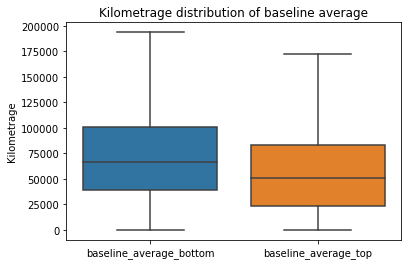

In [112]:
sns.boxplot(data=pd.concat([baseline_contracts_bottom['baseline_average_bottom'], baseline_contracts_top['baseline_average_top']], axis=1) , showfliers=False)
plt.ylabel('Kilometrage')
plt.title('Kilometrage distribution of baseline average')

#### 4.6 Statistical significance

In [113]:
Test_mean = stats.ttest_ind(baseline_contracts_bottom, baseline_contracts_top)
Test_mean

Ttest_indResult(statistic=array([16.99697812]), pvalue=array([4.4715725e-64]))

We notice that p value is infinitely small (<< 0.05) and statistic is very large, given the degrees of freedom of our data, we can confidently reject the null hypothesis H0 (means are equal). Consequently, the difference between the two scenarios is statistically significant.

## Interlude: Something is dodgy about this data...

---

Noticing the oddities in the data, you send an email to your contact at the insurance company asking about the integrity
 of the data. Their reply seems like something out of a detective movie:

> Dear researcher, I believe that this data is not to be trusted. I can't talk right now but will send further hints 
>throughout the week.

As a researcher, you know that [data integrity](https://en.wikipedia.org/wiki/Data_integrity) is a big deal, and decide
 to investigate.

### Task 5 — 9pts

The first hint you receive is: *there is something off about the kilometrage values in the data.*

1. For the baseline contract and for the updated contract, plot the distribution of odometer kilometrage reported for 
the first motorcycle insured in each policy. 
2. For the first motorcycle insured by the company in each policy, plot the difference between the number of kilometers
 reported in the baseline and in the updated contract.
3. **Discuss:** why is this data unlikely to have originated from real odometer readings?

---

#### 5.1 Distribution of kilometrage of motorcycle 1

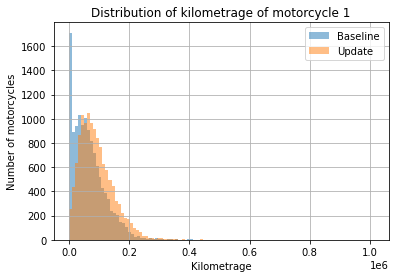

In [114]:
df['baseline_motorcycle1'].hist(bins=100, alpha=0.5, label='Baseline')
df['update_motorcycle1'].hist(bins=100, alpha=0.5, label='Update')
plt.title('Distribution of kilometrage of motorcycle 1')
plt.xlabel('Kilometrage')
plt.ylabel('Number of motorcycles')
plt.legend()

#### 5.2 Difference between baseline and update for motorcycle 1

Text(0, 0.5, 'Number of motorcycles')

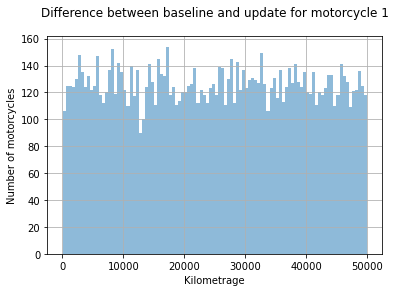

In [115]:
(df['update_motorcycle1']-df['baseline_motorcycle1']).hist(bins=100, alpha=0.5)
plt.title('Difference between baseline and update for motorcycle 1', pad=20)
plt.xlabel('Kilometrage')
plt.ylabel('Number of motorcycles')

#### 5.3 Discussion: why is this data unlikely to have originated from real odometer readings?

In [116]:
stats.kstest((df['update_motorcycle1']-df['baseline_motorcycle1']).values, stats.uniform(loc=0.0, scale=50000.0).cdf)

KstestResult(statistic=0.005358882184820585, pvalue=0.860400581322174)

The p-value is large so we can not reject the null hypothesis that the two samples were drawn from the same distribution. It states that the difference follows a uniform distribution.
https://stats.stackexchange.com/questions/57885/how-to-interpret-p-value-of-kolmogorov-smirnov-test-python

 It is frequently assumed that the distribution of the travel distance has a lognormal representation [Dong et al. 2018](https://www.researchgate.net/publication/327987851_Revealing_Travel_Patterns_of_Sharing-Bikes_in_a_Spatial-Temporal_Manner_Using_Non-Negative_Matrix_Factorization_Method) <br>
However, we observe that the difference does not follow a normal distribution but rather a uniform one (based on the test above), of values between 0 and 50000.
Hence, the updated values are unlikely to be reported from a real odometer. In fact, they are more likely to have been generated.

### Task 6 — 15pts

The second hint you receive is: *there is something off with the last digits of the reported kilometrages.*

1. Considering the baseline kilometrage of the first motorcycle in each contract (`baseline_motorcycle1`), plot the 
distribution of occurrences of the last three digits. Repeat the same for the updated kilometrage of the first 
motorcycle in each contract (`update_motorcycle1`).

3. **Discuss:** What are the differences between the two distributions?

4. **Discuss:** Hypothesize a **plausible** cause for the patterns observed in the digit distribution of the baseline
 kilometrage of the first motorcycle.
    
---

**Hint:** The last two digits of the number 12314 are 314. Note that you should consider the three last digits together,
 not separately!

#### 6.1  Last digits distribution

Text(0, 0.5, 'Number of motorcycles')

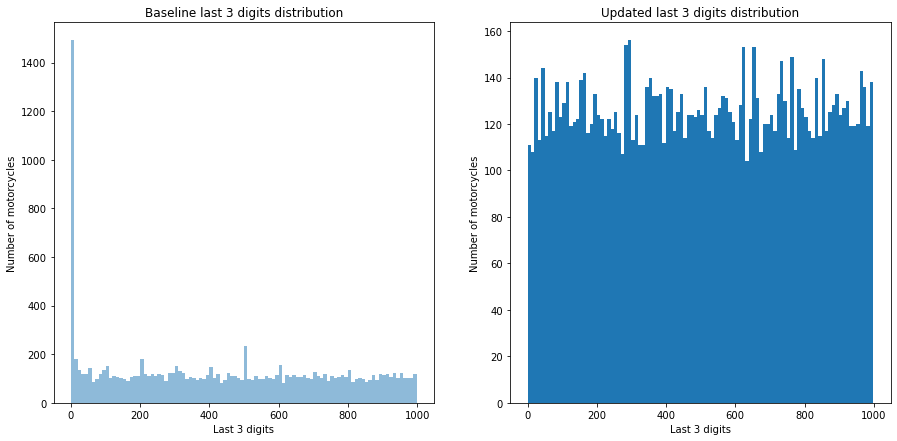

In [117]:
fig, axes = plt.subplots(1, 2, sharey=False, figsize=(15, 7))

last_digits_baseline = df['baseline_motorcycle1'].astype(str).str[-3:]
axes[0].hist(last_digits_baseline.astype(int), bins = 100, alpha=0.5, label='Baseline')
axes[0].set_title('Baseline last 3 digits distribution')
axes[0].set_xlabel('Last 3 digits')
axes[0].set_ylabel('Number of motorcycles')

last_digits_update = df['update_motorcycle1'].astype(str).str[-3:]
axes[1].hist(last_digits_update.astype(int), bins = 100, label='Update')
axes[1].set_title('Updated last 3 digits distribution')
axes[1].set_xlabel('Last 3 digits')
axes[1].set_ylabel('Number of motorcycles')

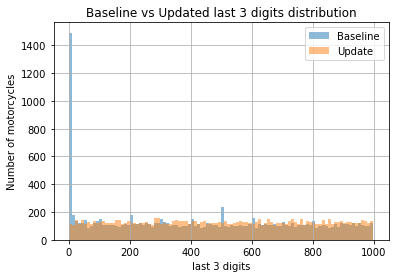

In [118]:
last_digits_baseline = df['baseline_motorcycle1'].astype(str).str[-3:]
last_digits_update = df['update_motorcycle1'].astype(str).str[-3:]

last_digits_baseline.astype(int).hist(bins = 100, alpha=0.5, label='Baseline')
last_digits_update.astype(int).hist(bins = 100, alpha=0.5, label = 'Update')
plt.title('Baseline vs Updated last 3 digits distribution')
plt.xlabel('last 3 digits')
plt.ylabel('Number of motorcycles')
plt.legend()

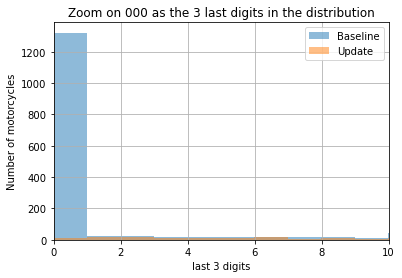

In [119]:
last_digits_baseline = df['baseline_motorcycle1'].astype(str).str[-3:]
last_digits_update = df['update_motorcycle1'].astype(str).str[-3:]

last_digits_baseline.astype(int).hist(bins = 1000, alpha=0.5, label='Baseline')
last_digits_update.astype(int).hist(bins = 1000, alpha=0.5, label = 'Update')
plt.title('Zoom on 000 as the 3 last digits in the distribution')
plt.xlabel('last 3 digits')
plt.ylabel('Number of motorcycles')
plt.xlim((0,10))
plt.legend()

#### 6.2 Discuss: What are the differences between the two distributions?

Looking at the two graphs, we can easily notice that there are much more digits ending with 0 in the baseline values with small peaks in values ending the hundreds (100,200...) while the same pattern does not appear in the updated values.


#### 6.3 Discuss: Hypothesize a plausible cause for the patterns observed in the digit distribution of the baseline kilometrage of the first motorcycle.

 A plausible cause for the patterns observed in the digit distribution of the baseline kilometrage of the first motorcycle, is that people naturally tend to round the reported kilometrage to the nearest thousand. Some of them, for the sake of accuracy, tend to report a rounded value to the nearest hundred. It is a practicality to facilitate the reporting process. 

### Task 7 — 15pts

The third (and last) hint you receive is: *there is something wrong with the fonts.*

Your anonymous source explains that the `.tsv` file sent to you was derived from an Excel sheet. There, some of the rows
 were written in the font *Helvetica* while others were written in the font *Arial*. Your anonymous source sends you a 
 file with the relation between policy id and the font used in the respective row (`fonts.csv`), and tells you that the
  rows with *Helvetica* font were fabricated.

1. Load `fonts.csv` and merge the `font` column into your pandas dataframe.
2. Considering only the kilometrage of the first motorcycle in each policy, calculate the number of rows with the Arial 
and the Helvetica font, respectively. Also, plot the distribution of baseline kilometers for rows with the Arial font 
and for rows with the Helvetica font.
3. Similar to what was done in task 6. Plot the distribution of the last three digits for 1) the first motorcycle in 
each baseline contract (`baseline_motorcycle1`); and 2) the first motorcycle in each updated contract
 (`update_motorcycle1`).
4. **Discuss:** Why do these analyses provide evidence that the rows with Helvetica font were fabricated?

---

#### 7.1 Loading and merging

In [120]:
fonts = pd.read_csv("Data/fonts.csv", sep=',')
fonts.head()

,id,font
0,1,Helvetica
1,2,Helvetica
2,3,Helvetica
3,4,Helvetica
4,5,Arial


In [121]:
merged = pd.merge(df, fonts, on='id').dropna(how='all')
merged.head()

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count,baseline_average,update_average,diff_average,font
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1,896.0,39198.0,38302.0,Helvetica
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2,27027.5,55558.0,28530.5,Helvetica
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2,33169.0,48231.0,15062.0,Helvetica
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1,23912.0,59136.0,35224.0,Helvetica
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1,16862.0,59292.0,42430.0,Arial


#### 7.2 Number of rows with the Arial and the Helvetica font

In [122]:
print('Number for rows with Arial is:', len(fonts[fonts['font'] == 'Arial']))
print('Number for rows with Helvatica is:', len(fonts[fonts['font'] == 'Helvetica']))

Number for rows with Arial is: 6744
Number for rows with Helvatica is: 6743


##### Distribution of baseline kilometers

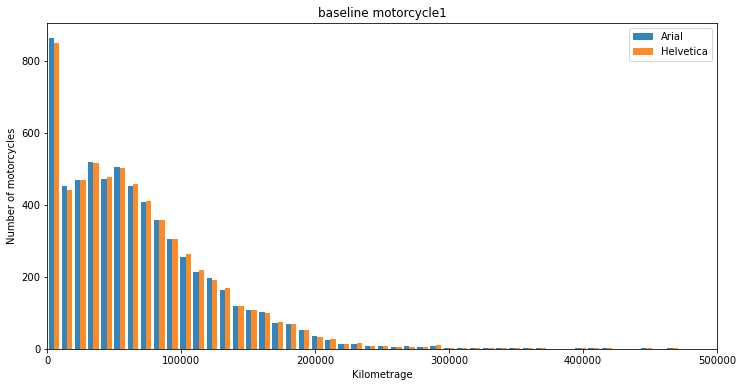

In [123]:
plt.figure(figsize=(12,6))
plt.hist([merged['baseline_motorcycle1'][merged['font']== 'Arial'], merged['baseline_motorcycle1'][merged['font']== 'Helvetica']], bins=100, alpha=0.9, label=["Arial", "Helvetica"])
plt.title('baseline motorcycle1')
plt.xlabel('Kilometrage')
plt.ylabel('Number of motorcycles')
plt.xlim(0,0.5e6)
plt.legend()

#### 7.3 Last 3 digits distribution

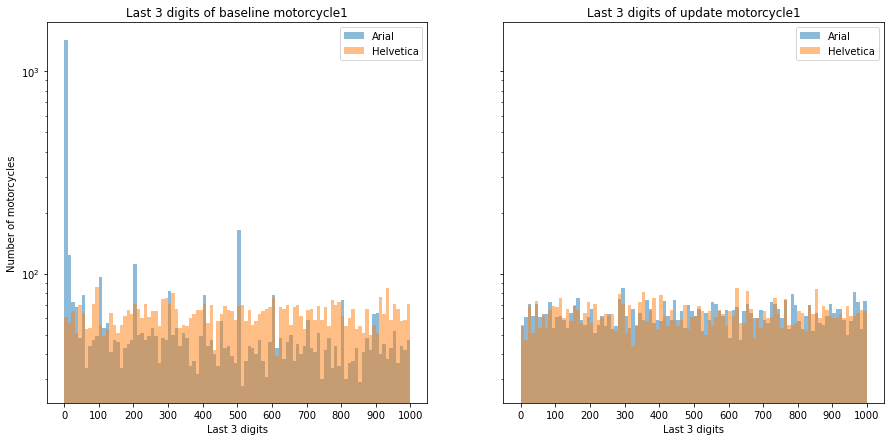

In [124]:
fig, axes = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(15, 7))

last_digits_arial = merged['baseline_motorcycle1'][merged['font']== 'Arial'].astype(int).astype(str).str[-3:]
last_digits_helvetica = merged['baseline_motorcycle1'][merged['font']== 'Helvetica'].astype(int).astype(str).str[-3:]
axes[0].hist(last_digits_arial.astype(int), bins= 100, alpha=0.5, label='Arial')
axes[0].hist(last_digits_helvetica.astype(int), bins = 100, alpha=0.5, label = 'Helvetica')
axes[0].set_title('Last 3 digits of baseline motorcycle1')
axes[0].set_xlabel('Last 3 digits')
axes[0].set_ylabel('Number of motorcycles')
axes[0].set_yscale('log')
axes[0].legend()

last_digits_arial = merged['update_motorcycle1'][merged['font']== 'Arial'].astype(int).astype(str).str[-3:]
last_digits_helvetica = merged['update_motorcycle1'][merged['font']== 'Helvetica'].astype(int).astype(str).str[-3:]
axes[1].hist(last_digits_arial.astype(int), bins= 100, alpha=0.5, label='Arial')
axes[1].hist(last_digits_helvetica.astype(int), bins= 100, alpha=0.5, label = 'Helvetica')
axes[1].set_title('Last 3 digits of update motorcycle1')
axes[1].set_xlabel('Last 3 digits')
axes[1].legend()

plt.xticks(range(0,1001, 100))
plt.show()

#### 7.4 Discuss: Why do these analyses provide evidence that the rows with Helvetica font were fabricated?

In the previous task, we came to the conclusion that people tend to round the reported kilometrage to the nearest 1000. In the figures above, we can observe that motorcycles which kilometres end with 000 appear a large number of times only in contracts with Arial font in the baseline. However, in the updated kilometrage, we don't see the same pattern. <br>
Our plausible explanation: half of the baseline values were tampered with (which corresponds to Helvetica font that doesn't contain most of 000), then random numbers coming from a uniform distrution were added to the whole baseline values to produce the updated value, that's why the 000 spike doesn't appear anymore.
It seems that the data with Helvetica font were fabricated.

### Task 8 — 15pts

You've had enough! You decide to write an email to your PI (principal investigator, also known as "your boss") reporting
 the oddities you have observed in the data. Write a (brief) text (in markdown) of up to 300 words. Your text should:

- Use the analyses you did to make a convincing case that the data has been tampered with. 
- Grounded in your analyses, provide a plausible hypothesis about how the data has been tampered with.
- Discuss whether the data leads to the conclusion that signing at the top decreases dishonesty.

Structure your text into three bullets, analogous to the ones above.

You can reference images present in the notebook by indicating a task (e.g., image plotted in Task 3.3) or a cell 
number.

Note that you do not need to conduct any additional analysis to write this text. If you do, the code should be at the 
end of this notebook, i.e., after your answer.

---

**Hint:** The data has been tampered with in more than one way.


<li>In the baseline contract, two distributions corresponding to two different fonts are the same, but the one with Arial has a large number of values ending with 000, while the Helvetica font does not.<br>
The difference between baseline and update kilometrages doesn't follow a lognormal distribution as we would would exepct, but follows a uniform distribution.


<li>Half of the baseline values were tampered with (which corresponds to Helvetica font that doesn't contain most of 000). Based on the similarity of the two distributions of baseline kilometers for rows with the Arial font and for rows with the Helvetica font (task 7.2), it seems that small numbers were added or substracted to half of the baseline values.
Then we assume that the person who corrupted the data created the update column by simply copying the baseline column and adding random numbers to its values. This is coherent with the fact that the font is the same within the each row. 
One can observe from task 5.2 that the difference between the baseline and the update kilometrage follows a uniform distribution. This suggests that the person who modified the data added random numbers coming from a uniform distrution to the whole baseline values in order to produce the updated values, this is why the 000 spike does not appear anymore in half of the baseline data as well as the whole update data.


<li>We cannot draw a conclusion from the data we have, since it was tampered with. <br>
In fact, decision making should only rely on data that has kept its integrity untouched. Given that there is a financial cost associated with changing the position of signature, it would be safer to redo the experiment again using a new dataset that contains the real kilometrage.